In [1]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
import tensorflow as tf

from IPython import display

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

tf.config.run_functions_eagerly(True)        

1 Physical GPUs, 1 Logical GPUs


2022-01-08 23:45:56.562576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 23:45:56.568423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 23:45:56.568619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 23:45:56.596571: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [2]:
image_filename_dataset_1 = tf.data.Dataset.list_files("/disk0/CAT_final_2/*.jpg", shuffle=True)
image_dataset_1 = image_filename_dataset_1.map(lambda x: tf.io.decode_jpeg(tf.io.read_file(x)))

image_filename_dataset_2 = tf.data.Dataset.list_files("/disk0/archive/test_set/test_set/cats/*.jpg", shuffle=True)
image_dataset_2 = image_filename_dataset_2.map(lambda x: tf.io.decode_jpeg(tf.io.read_file(x)))

image_filename_dataset_3 = tf.data.Dataset.list_files("/disk0/archive/training_set/training_set/cats/*.jpg", shuffle=True)
image_dataset_3 = image_filename_dataset_3.map(lambda x: tf.io.decode_jpeg(tf.io.read_file(x)))

/home/jack/ml/my_env/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [3]:
image_dataset_un_pre = image_dataset_3.concatenate(image_dataset_2).concatenate(image_dataset_1)

In [4]:
#import cv2
from matplotlib import pyplot as plt

def image_preprocess(image):
    image = tf.image.resize(image, (224,224))
    #image = tf.image.rgb_to_grayscale(image)
    return ((image-127.4) /127.5)

image_dataset = image_dataset_un_pre.map(image_preprocess)

ds = image_dataset.batch(16).prefetch(1)

In [5]:
for image in image_dataset.take(16):
    print(image)

tf.Tensor(
[[[-0.7274195  -0.7274195  -0.82153714]
  [-0.7414426  -0.7414426  -0.8355602 ]
  [-0.7316387  -0.7316387  -0.8257563 ]
  ...
  [-0.48941177 -0.68519264 -0.9135364 ]
  [-0.48911414 -0.6756863  -0.87297267]
  [-0.59273815 -0.7675455  -0.9354202 ]]

 [[-0.71882355 -0.71882355 -0.8129412 ]
  [-0.72559875 -0.72559875 -0.8197164 ]
  [-0.70747894 -0.70747894 -0.80159664]
  ...
  [-0.50028366 -0.6865581  -0.902367  ]
  [-0.5191737  -0.69184524 -0.86588234]
  [-0.63682073 -0.8018242  -0.94146013]]

 [[-0.73380953 -0.73380953 -0.8122409 ]
  [-0.7274545  -0.7274545  -0.8058859 ]
  [-0.70509803 -0.70509803 -0.7835294 ]
  ...
  [-0.52274513 -0.6934909  -0.88030815]
  [-0.5609454  -0.72157216 -0.8613305 ]
  [-0.7089496  -0.8514566  -0.95003855]]

 ...

 [[ 0.3491737   0.32564428  0.25505605]
  [ 0.34376407  0.32070726  0.24870096]
  [ 0.33537808  0.31428218  0.23639353]
  ...
  [-0.59702724 -0.5275246  -0.44627452]
  [-0.61161065 -0.55152667 -0.44557416]
  [-0.59396356 -0.5456443  -0.422

In [6]:
from matplotlib import pyplot as plt

for line in image_dataset.take(32):
    print(line)

tf.Tensor(
[[[1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  ...
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]]

 [[1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  ...
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]]

 [[1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  ...
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]]

 ...

 [[1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  ...
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]]

 [[1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  [1.0007843 1.0007843 1.0007843]
  ...
  [1.0007843 1.0007843 1.00

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

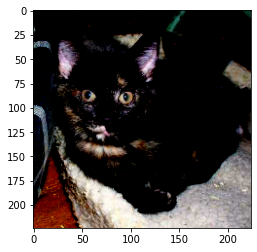

In [7]:
for i in image_dataset.take(12):
    plt.imshow(i)

In [8]:
BATCH_SIZE = 32
full_dataset = ds
train_dataset = ds

In [9]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    
    model.add(tf.keras.layers.Conv2DTranspose(512, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 512)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 256)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 28, 28, 128)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 56, 56, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 112, 112, 32)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 224, 224, 3)

    return model

2022-01-08 23:45:57.831976: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-01-08 23:45:58.127890: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8200
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[127.40027 , 127.39991 , 127.400185],
        [127.400536, 127.4009  , 127.403854],
        [127.398346, 127.39865 , 127.40332 ],
        ...,
        [127.40038 , 127.39127 , 127.41315 ],
        [127.40193 , 127.39844 , 127.40248 ],
        [127.39902 , 127.40051 , 127.41091 ]],

       [[127.39661 , 127.4008  , 127.39771 ],
        [127.390594, 127.3937  , 127.38375 ],
        [127.38501 , 127.40873 , 127.39544 ],
        ...,
        [127.41989 , 127.38448 , 127.390205],
        [127.380516, 127.407005, 127.42401 ],
        [127.39907 , 127.4052  , 127.41858 ]],

       [[127.40381 , 127.397995, 127.40076 ],
        [127.39284 , 127.40661 , 127.39795 ],
        [127.41031 , 127.39263 , 127.40873 ],
        ...,
        [127.417274, 127.40764 , 127.37019 ],
        [127.37451 , 127.40261 , 127.41121 ],
        [127.41627 , 127.399704, 127.41284 ]],

       ...,

       [[127.398735, 127.39986 , 127.38556 ],
        [127.

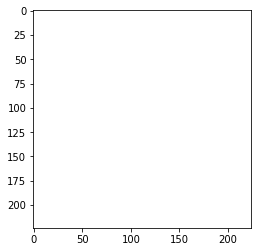

In [10]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow((generated_image[0] *127.5) + 127.4)
(generated_image[0] *127.5) + 127.4

In [11]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 512)        3276800   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 512)        2

In [12]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[224, 224, 3]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))

    return model

In [13]:
discriminator = make_discriminator_model()

In [14]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      4864      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 56, 56, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)      

In [15]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[8.8234156e-05]], shape=(1, 1), dtype=float32)


In [16]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [17]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [18]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [19]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [20]:
checkpoint_dir = '/home/jack/ml/my_env/training_checkpoints_expanded'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [21]:
EPOCHS = 300
noise_dim = 100
num_examples_to_generate = 32

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [22]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [23]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    #Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

In [24]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    
    fig = plt.figure(figsize=(4, 4))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')
    plt.savefig('/home/jack/ml/my_env/gan_images_expanded/image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

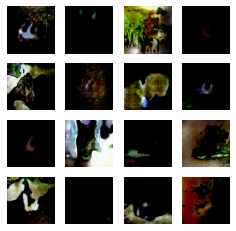

In [25]:
train(train_dataset, EPOCHS)

In [28]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('/home/jack/ml/my_env/gan_images_expanded/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
    writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


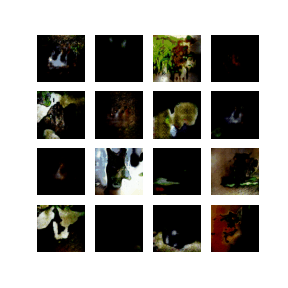

In [29]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)